##Diferencias Hacia Atras
Método diferencias hacia atras para aproximación de derivadas

In [1]:
import numpy as np
import pandas as pd
import fractions
import sympy as sp
import math 
from math import *
from math import e
from sympy import *
import matplotlib.pyplot as plt
x= symbols('x')
h= symbols('h')

In [2]:
#Imprime como fraccion
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

In [3]:
funcion= (x**4)*e**(-x)-(x**2)*e**(-2*x)

In [16]:
def alpha_atras(d,p): 
  ne=d+p
  m0=(-1)*(ne-1)
  m1= 0
  A= np.zeros((ne, ne))
  b= np.zeros(ne)

  for i in range(ne):
    if i+1==d:
      b[i+1]= 1
    for indice,j in zip(range(ne), range(m0,m1+1)):
      if i==0:
        A[i,indice]= 1
      else: 
        A[i,indice]= j**i
  a= np.linalg.solve(A,b)
  return a

In [18]:
def aprox_atras(fx,d,p,xi,j):
  #Calculamos derivada
  g=diff(fx,x,d)
  g=g.subs(x,xi)

  #Calculamos la aproximacion de la derivada
  ne=d+p
  m0=(-1)*(ne-1)
  m1= 0
  alpha= alpha_atras(d,p)
  faprox=0
  for indice,i in zip(range(ne),range(m0,m1+1)):
    faprox+= ((alpha[indice]*(fx.subs(x,x+i*h)))*math.factorial(d))/h**d
  hi=2**(-j)
  faprox= faprox.subs(x,xi).subs(h,hi)
  E= abs(g-faprox)
  #print('derivada',d,':',g,'aproximacion:',faprox,'con precisión',p,'error:',E)
  return g,faprox,E

In [19]:
datos_atras= []
derivada,aprox,error= aprox_atras(funcion,4,2,-1,1)
datos_atras.append([1,2**(-1),derivada,aprox,error])
hViejo= 2**(-1)

for i in range(2,16):
  derivada,aprox,errorN= aprox_atras(funcion,4,2,-1,i)
  hNuevo= 2**(-i)
  alpha= log(errorN/error)/log(hNuevo/hViejo)
  datos_atras.append([i, 2**(-i), derivada, aprox, errorN, alpha])
  error, hViejo= errorN,hNuevo
  
datos_atras = pd.DataFrame(datos_atras).set_axis(['j','h','ValorF', 'ApproxF', 'Error', 'Alpha'], axis=1)
datos_atras

,j,h,ValorF,ApproxF,Error,Alpha
0,1,0.500000,-377.678278515183,54769.0894962897,55146.7677748049,None
1,2,0.250000,-377.678278515183,2559.50837381807,2937.18665233325,4.23076947595394
2,3,0.125000,-377.678278515183,-23.1705668643117,354.507711650871,3.05054603291279
3,4,0.062500,-377.678278515183,-315.240786833689,62.4374916814941,2.50533252512455
4,5,0.031250,-377.678278515183,-364.525697320700,13.1525811944830,2.24706662444428
5,6,0.015625,-377.678278515183,-374.656860351563,3.02141816362018,2.12204818457312
6,7,0.007812,-377.678278515183,-376.954013824463,0.724264690719792,2.06063691856266
7,8,0.003906,-377.678278515183,-377.501037597656,0.177240917526433,2.03080534250770
8,9,0.001953,-377.678278515183,-377.634765625000,0.0435128901826829,2.02619694953060
9,10,0.000977,-377.678278515183,-377.671875000000,0.00640351518268290,2.76450685669777


In [20]:
datos_at= []
derivada,aprox,error= aprox_atras(funcion,4,4,-1,1)
datos_at.append([1,2**(-1),derivada,aprox,error])
hViejo= 2**(-1)

for i in range(2,16):
  derivada,aprox,errorN= aprox_atras(funcion,4,4,-1,i)
  hNuevo= 2**(-i)
  alpha= log(errorN/error)/log(hNuevo/hViejo)
  datos_at.append([i, 2**(-i), derivada, aprox, errorN, alpha])
  error, hViejo= errorN,hNuevo
  
datos_at = pd.DataFrame(datos_at).set_axis(['j','h','ValorF', 'ApproxF', 'Error', 'Alpha'], axis=1)
datos_at

,j,h,ValorF,ApproxF,Error,Alpha
0,1,0.500000,-377.678278515183,519935.008280387,520312.686558903,None
1,2,0.250000,-377.678278515183,3552.93622505071,3930.61450356589,7.04848019626265
2,3,0.125000,-377.678278515183,-288.113174314378,89.5651042008049,5.45567431975901
3,4,0.062500,-377.678278515183,-374.257363256067,3.42091525911565,4.71048247580466
4,5,0.031250,-377.678278515183,-377.510625004768,0.167653510414311,4.35082777052059
5,6,0.015625,-377.678278515183,-377.668986320496,0.00929219468707743,4.17331949975751
6,7,0.007812,-377.678278515183,-377.677734375000,0.000544140182682895,4.09396910636045
7,8,0.003906,-377.678278515183,-377.679443359375,0.00116484419231710,-1.09808672023352
8,9,0.001953,-377.678278515183,-377.671875000000,0.00640351518268290,-2.45872708870968
9,10,0.000977,-377.678278515183,-377.875000000000,0.196721484817317,-4.94114663512823


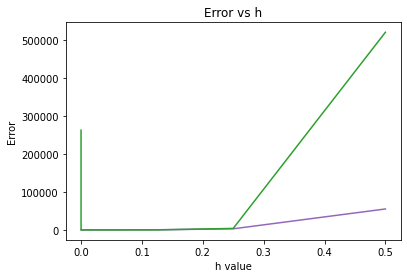

In [21]:
fig, ax = plt.subplots()
ax.plot(datos_atras["h"],datos_atras["Error"], color = 'tab:purple')
ax.plot(datos_at["h"],datos_at["Error"], color = 'tab:green')
plt.title("Error vs h")
plt.xlabel("h value")
plt.ylabel("Error")
plt.show()

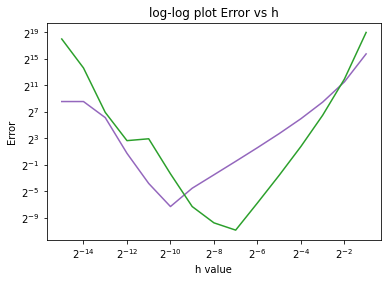

In [22]:
plt.loglog(datos_atras["h"], datos_atras["Error"], basex = 2, basey = 2,color = 'tab:purple')
plt.loglog(datos_at["h"], datos_at["Error"], basex = 2, basey = 2,color = 'tab:green')
plt.title("log-log plot Error vs h")
plt.xlabel("h value")
plt.ylabel("Error")
plt.show()